### Mengimpor Library

In [1]:
# Mengimpor library
import numpy as np  # Mengimpor library numpy dengan alias np
import matplotlib.pyplot as plt  # Mengimpor submodul pyplot dari library matplotlib dengan alias plt
import pandas as pd  # Mengimpor library pandas dengan alias pd

### 2. Mengimpor Dataset

### Pastikan sudah mendownload file CSV 'Posisi_gaji.csv' dan letakkan dalam direktori yang sama. Ini adalah dataset yang akan digunakan dalam praktikum ini.

### Membaca dataset menggunakan pd.read_csv dan memilih fitur (variabel independen X) dan target (variabel dependen y).

In [2]:
# Mengimpor dataset (Pastikan Anda memiliki file CSV 'Posisi_gaji.csv' dalam direktori yang sama)
dataset = pd.read_csv('Posisi_gaji.csv')  # Membaca file CSV 'Posisi_gaji.csv' dan menyimpannya ke dalam variabel dataset
X = dataset.iloc[:, 1:2].values  # Memilih kolom 1 sebagai fitur (variabel independen) dan mengonversinya ke bentuk array numpy
y = dataset.iloc[:, 2].values  # Memilih kolom 2 sebagai target (variabel dependen) dan mengonversinya ke bentuk array numpy

### 3. Feature Scaling

### Menggunakan StandardScaler untuk melakukan penskalaan fitur X dan target y. Ini diperlukan karena SVM sangat sensitif terhadap skala data.

In [3]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler  # Mengimpor modul StandardScaler dari library sklearn.preprocessing

sc_X = StandardScaler()  # Inisialisasi objek StandardScaler untuk fitur (variabel independen)
sc_y = StandardScaler()  # Inisialisasi objek StandardScaler untuk target (variabel dependen)

X = sc_X.fit_transform(X.reshape(-1, 1))  # Melakukan feature scaling pada variabel independen X menggunakan StandardScaler
y = sc_y.fit_transform(y.reshape(-1, 1))  # Melakukan feature scaling pada variabel dependen y menggunakan StandardScaler

### 4. Fitting SVR ke Dataset

### Lakukan pembuatan model SVR dengan kernel RBF (Radial Basis Function) dan melatihnya dengan data yang telah di-scaled.

In [4]:
# Fitting SVR to the dataset
from sklearn.svm import SVR  # Importing the Support Vector Regression (SVR) module from sklearn.svm

regressor = SVR(kernel='rbf')  # Creating an SVR regressor with a radial basis function (RBF) kernel
regressor.fit(X, y)  # Fitting the SVR regressor to the independent variable X and dependent variable y

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

### Visualisasi Hasil SVR

### langkah selanjutkan, lakukan visualisasi Menggunakan grafik untuk memvisualisasikan hasil prediksi model SVR. Ini mencakup plotting data asli (titik-titik merah) dan kurva hasil prediksi (garis biru) untuk tingkat posisi yang bervariasi.

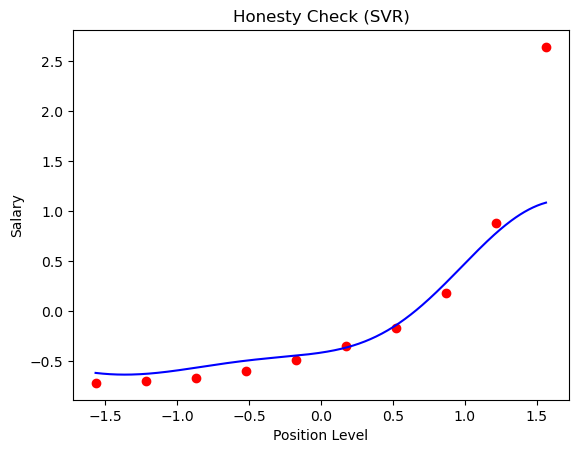

In [5]:
# Visualizing SVR results (higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)  # Generating a higher resolution grid of values for X

plt.scatter(X, y, color='red')  # Plotting the actual data points (X vs y) as a scatter plot in red
plt.plot(X_grid, regressor.predict(X_grid), color='blue')  # Plotting the SVR predicted values based on X_grid in blue
plt.title('Honesty Check (SVR)')  # Setting the title for the plot as 'Honesty Check (SVR)'
plt.xlabel('Position Level')  # Labeling the x-axis as 'Position Level'
plt.ylabel('Salary')  # Labeling the y-axis as 'Salary'
plt.show()  # Displaying the visualized plot

### Prediksi Hasil

### - Membuat array 2D yang berisi tingkat posisi yang akan diprediksi. Dalam contoh ini, tingkat posisi 6.5.
### - Menskalakan fitur prediksi menggunakan sc_X.transform.
### - Melakukan prediksi menggunakan model SVR yang telah dilatih.
### - Mengembalikan hasil prediksi ke dalam skala aslinya menggunakan sc_y.inverse_transform.

In [6]:
# Prediksi hasil
# Buat array 2D yang berisi tingkat posisi yang akan diprediksi
tingkat_posisi_prediksi = np.array([[6.5]])
# Penskalaan fitur untuk data yang akan diprediksi
tingkat_posisi_prediksi = sc_X.transform(tingkat_posisi_prediksi)
# Melakukan prediksi menggunakan model SVR
gaji_prediksi = regressor.predict(tingkat_posisi_prediksi)
# Kembalikan hasil prediksi ke skala aslinya
gaji_prediksi = sc_y.inverse_transform(gaji_prediksi.reshape(-1, 1))

### Menampilkan Hasil:

### Menampilkan hasil prediksi gaji untuk tingkat posisi 6.5 dalam kode

In [7]:
# Menampilkan hasil prediksi
print("Prediksi Gaji untuk Tingkat Posisi 6.5:", gaji_prediksi[0])

Prediksi Gaji untuk Tingkat Posisi 6.5: [170370.0204065]


### 8. Validasi Hasil

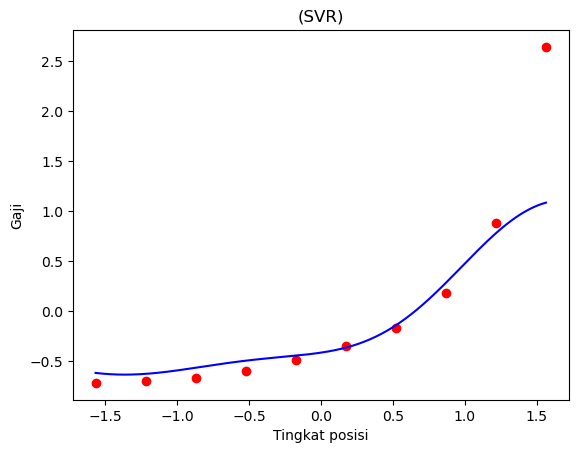

In [8]:
# Visualizing SVR results (higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)  # Generating a higher resolution grid of values for X

plt.scatter(X, y, color='red')  # Plotting the actual data points (X vs y) as a scatter plot in red
plt.plot(X_grid, regressor.predict(X_grid), color='blue')  # Plotting the SVR predicted values based on X_grid in blue
plt.title('(SVR)')  # Setting the title for the plot as '(SVR)'
plt.xlabel('Tingkat posisi')  # Labeling the x-axis as 'Tingkat posisi' (Position Level)
plt.ylabel('Gaji')  # Labeling the y-axis as 'Gaji' (Salary)
plt.show()  # Displaying the visualized plot

### 9. Evaluasi Model SVR

### Langkah terakhir adalah melakukan evaluasi model meliputi MAE, MSE dan R-squared

In [10]:
# Evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_actual = y 
y_pred = regressor.predict(X)

# Menghitung MAE
mae = mean_absolute_error(y_actual, y_pred)

# Menghitung MSE
mse = mean_squared_error(y_actual, y_pred)

# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung R-squared
r2 = r2_score(y_actual, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 0.22299274095734414
MSE: 0.24839989293792014
RMSE: 0.4983973243687411
R-squared: 0.7516001070620798
